# Stereographic projection
The unit sphere S2 in three-dimensional space R3 is the set of points (x, y, z) such that x^2 + y^2 + z^2 = 1. Let N = (0, 0, 1) be the "north pole", and let M be the rest of the sphere. The plane z = 0 runs through the center of the sphere; the "equator" is the intersection of the sphere with this plane.

For any point P on M, there is a unique line through N and P, and this line intersects the plane z = 0 in exactly one point P′, known as the stereographic projection of P onto the plane.

In Cartesian coordinates (x, y, z) on the sphere and (X, Y) on the plane, the projection and its inverse are given by the formulas

-Graphics3D-
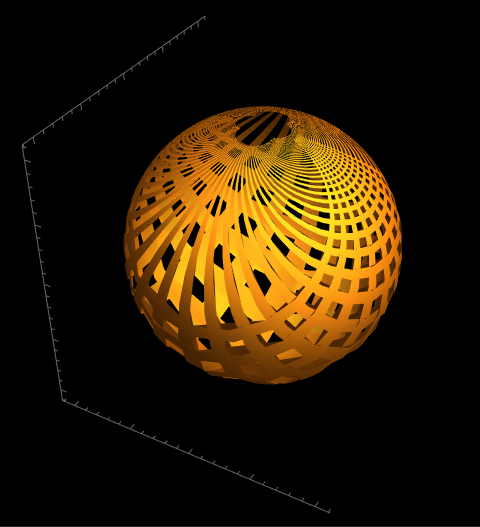

In [67]:
F[{x_, y_}] := {(2 x)/(1 + x^2 + y^2), (2 y)/(  1 + x^2 + y^2), (-1 + x^2 + y^2)/(1 + x^2 + y^2)}
px[x_] := ParametricPlot3D[ F[{x + u, y}], {u, 0, 0.1}, {y, -8, 8},  Mesh -> None]
py[y_] :=  ParametricPlot3D[ F[{x, y + u}], {u, 0, 0.1}, {x, -8, 8}, Mesh -> None]
output = Show[Table[px[t], {t, -10, 10, 0.22}]~Join~Table[py[t], {t, -1, 1, 0.22}],
PlotRange -> {{-1, 1}, {-1, 1}, {-1, 1}}, Background -> Black, Boxed -> False]

# Enneper surface
In differential geometry and algebraic geometry, the Enneper surface is a self-intersecting surface that can be described parametrically by:

\begin{aligned}x&={\tfrac {1}{3}}u\left(1-{\tfrac {1}{3}}u^{2}+v^{2}\right),\\y&={\tfrac {1}{3}}v\left(1-{\tfrac {1}{3}}v^{2}+u^{2}\right),\\z&={\tfrac {1}{3}}\left(u^{2}-v^{2}\right).\end{aligned}
It was introduced by Alfred Enneper in 1864 in connection with minimal surface theory

-Graphics3D-
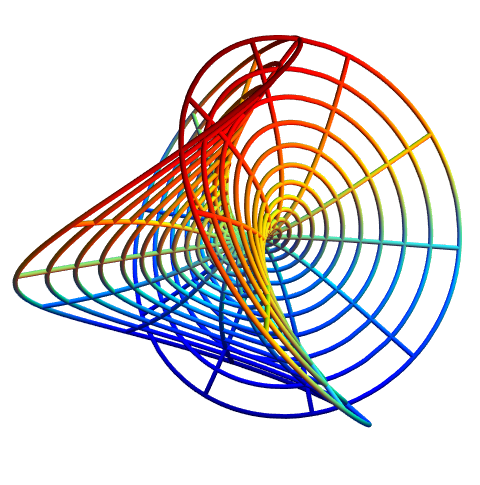

In [19]:
jet[u_?NumericQ] :=
        Blend[{{0, RGBColor[0, 0, 9/16]}, {1/9, Blue}, {23/63, Cyan}, {13/21, Yellow},
               {47/63, Orange}, {55/63, Red}, {1, RGBColor[1/2, 0, 0]}}, u] /; 0 <= u <= 1

(* generalized Enneper surface, polar parametrization *)
enneperpolar[n_Integer, r_, θ_] := {r Cos[θ] - r^(2 n - 1)/(2 n - 1) Cos[(2 n - 1) θ],
                                    r Sin[θ] + r^(2 n - 1)/(2 n - 1) Sin[(2 n - 1) θ],
                                    (2 r^n)/n Cos[n θ]}

With[{n = 2, p = 25, q = 15}, 
     Show[ParametricPlot3D[Table[enneperpolar[n, r, θ], {θ, -π, π, 2 π/p}], {r, 0, 2},
                           ColorFunction -> (jet[#3] &), PlotRange -> All,
                           PlotStyle -> Directive[CapForm[None], JoinForm["Miter"]]], 
          ParametricPlot3D[Table[enneperpolar[n, r, θ], {r, 0, 2, 2/q}], {θ, -π, π}, 
                           ColorFunction -> (jet[#3] &), PlotRange -> All,
                           PlotStyle -> Directive[CapForm[None], JoinForm["Miter"]]], 
          Axes -> None, Boxed -> False, Lighting -> "Classic"] /.
     Line[pts_, rest___] :> Tube[pts, 1/20, rest]]

# Möbius strip
In mathematics, a Möbius strip, Möbius band, or Möbius loop (US: /ˈmoʊbiəs, ˈmeɪ-/ MOH-bee-əs, MAY-, UK: /ˈmɜːbiəs/;[1] German: [ˈmøːbi̯ʊs]), also spelled Mobius or Moebius, is a surface with only one side (when embedded in three-dimensional Euclidean space) and only one boundary curve. The Möbius strip is the simplest non-orientable surface. It can be realized as a ruled surface. Its discovery is attributed independently to the German mathematicians Johann Benedict Listing and August Ferdinand Möbius in 1858,[2][3][4][5] though similar structures can be seen in Roman mosaics c. 200–250 AD.[6][7] Möbius published his results in his articles "Theorie der elementaren Verwandtschaft" (1863) and "Ueber die Bestimmung des Inhaltes eines Polyëders" 

-Graphics3D-
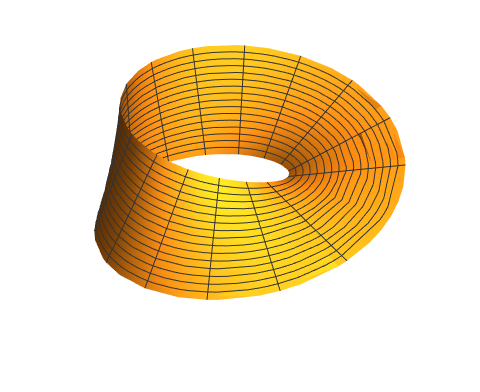

In [37]:
 x[u_, v_] := (1 + (v/2) Cos[u/2]) Cos[u]
 y[u_, v_] := (1 + (v/2) Cos[u/2]) Sin[u]
 z[u_, v_] := (v/2) Sin[u/2]


 plot = ParametricPlot3D[{x[u, v], y[u, v], z[u, v]}, {u, 0, 
    2 Pi}, {v, -1, 1}, Boxed -> False, Axes -> False]

# Boy's surface
In geometry, Boy's surface is an immersion of the real projective plane in 3-dimensional space found by Werner Boy in 1901. He discovered it on assignment from David Hilbert to prove that the projective plane could not be immersed in 3-space.

Boy's surface was first parametrized explicitly by Bernard Morin in 1978.[1] Another parametrization was discovered by Rob Kusner and Robert Bryant.[2] Boy's surface is one of the two possible immersions of the real projective plane which have only a single triple point.[3]

Unlike the Roman surface and the cross-cap, it has no other singularities than self-intersections (that is, it has no pinch-points).

-Graphics3D-
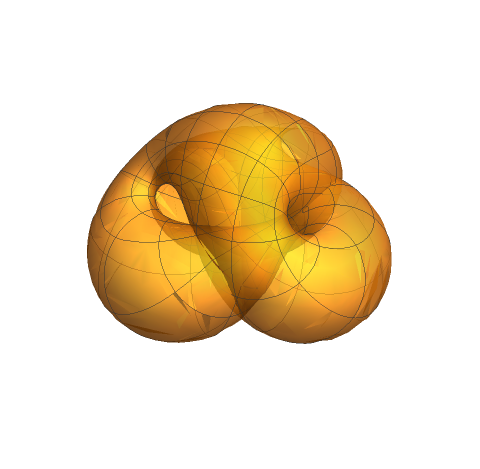

In [46]:
ParametricPlot3D[With[{z = u + I v}, (#/(#.#)) &[Re[{0, 0, 1/2} +
                      {I z (1 - z^4), z (z^4 + 1), -(2 I/3) (z^6 + 1)}/
                      (z^6 + Sqrt[5] z^3 - 1)]]], {u, v} ∈ Disk[],
                 Axes -> None, Boxed -> False, Mesh -> True,
                 PlotPoints -> {20, 30}, PlotStyle -> Opacity[2/3]]